In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.neural_network
from sklearn.metrics import confusion_matrix

In [2]:
def read(path_folder):
    folder = []
    for f in glob.iglob(path_folder+"/*"):
        folder.append(f[len(path_folder):]+"/")
    folder = np.array(folder)
    x = []
    y = []
    for i in folder:
        files = np.array(glob.glob(path_folder+i+"/*.png"))
        for j in files:
            img = np.array(plt.imread(j)).astype(float)
            shape = np.shape(img)
            x.append(img.flatten())
#             label = np.argwhere(folder == i)[0][0]
            y.append(i[:-1])
    return np.array(x), np.array(y), len(folder), shape

In [3]:
folder = "../Datasets/places"
path_folder = "./"+folder+"-raw/"
X, Y, K, shape = read(path_folder)

In [4]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [5]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
nn = np.arange(1,K)
F1_mlp = np.zeros(len(nn))

for i, n in enumerate(nn):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(n), max_iter=3000)
    mlp.fit(X_train, y_train)
    F1_mlp[i] = sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro')
    
clf = LogisticRegression(C=1, penalty='l1', solver='saga', tol=0.01, multi_class="auto")
clf.fit(X_train, y_train)
F1_logit = sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro')

/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


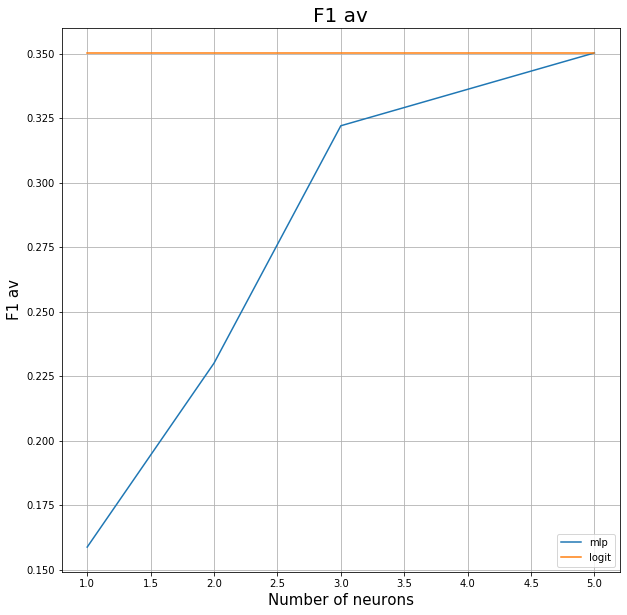

In [7]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.title("F1 av", size=20)
plt.xlabel("Number of neurons",size=15)
plt.ylabel("F1 av",size=15)
plt.plot(nn,F1_mlp,label="mlp")
plt.plot(nn,F1_logit*np.ones(len(nn)),label="logit")
plt.grid()
plt.legend()

# plt.savefig("log_f1.png")
plt.show()

In [8]:
layer_1 = range(1,int(K/2))
layer_2 = range(2,K)
F1_mlp = np.zeros((len(layer_1),len(layer_2)))

for i, n in enumerate(layer_1):
    for j, k in enumerate(layer_2):
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(n,k), max_iter=2500)
        mlp.fit(X_train, y_train)
        F1_mlp[i][j] = sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro')

/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


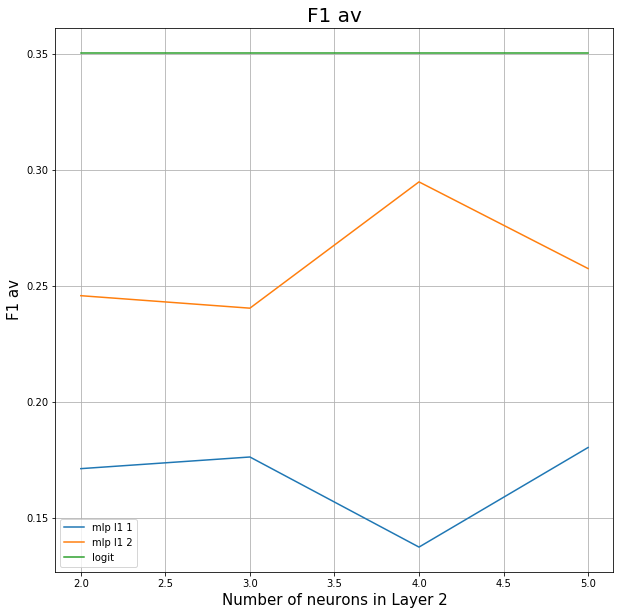

In [9]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.title("F1 av", size=20)
plt.xlabel("Number of neurons in Layer 2",size=15)
plt.ylabel("F1 av",size=15)
for i in range(len(layer_1)):
    plt.plot(layer_2,F1_mlp[i,:],label="mlp l1 "+str(layer_1[i]))
plt.plot(layer_2,F1_logit*np.ones(len(layer_2)),label="logit")
plt.grid()
plt.legend()
# plt.savefig("log_f1.png")
plt.show()